# Data Loading

In [2]:
import pandas as pd

# Load the datasets
data1 = pd.read_csv('unemployment/Unemployment in India.csv')
data2 = pd.read_csv('unemployment/Unemployment_Rate_upto_11_2020.csv')

# Display the first few rows of the datasets
print(data1.head())
print(data2.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0 

# Data Cleaning

In [3]:
# Checking for missing values
print(data1.isnull().sum())
print(data2.isnull().sum())

# Example of filling missing values, if any
# data1.fillna(method='ffill', inplace=True)

# Correcting data types if needed
# data1['column_name'] = data1['column_name'].astype('desired_type')


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


# Exploratory Data Analysis (EDA)

In [4]:
# Basic statistical details
print(data1.describe())
print(data2.describe())

# Further EDA can be done based on specific requirements


        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                    

# Data Visualization

C:\Users\kavidha\AppData\Local\Temp\ipykernel_26732\721030175.py:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_india['Date'] = pd.to_datetime(data_india['Date'], errors='coerce')


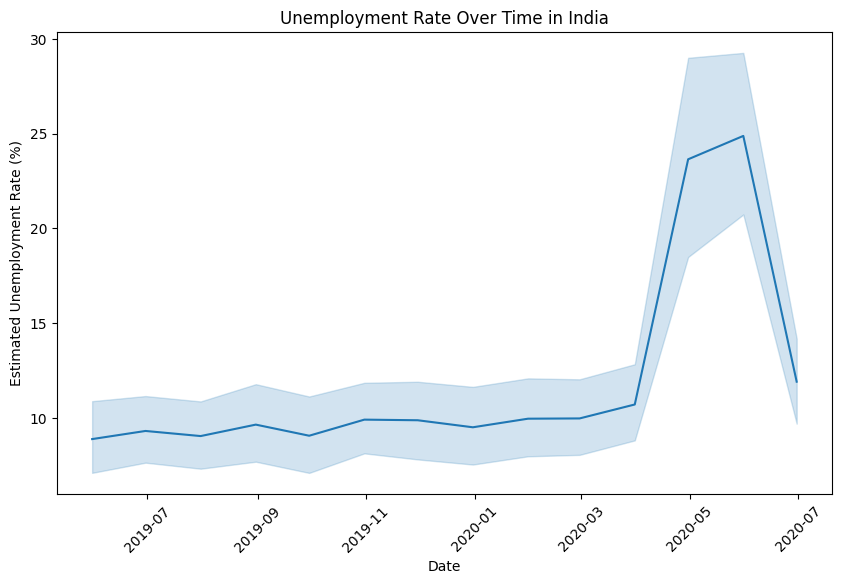

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_india = pd.read_csv('unemployment/Unemployment in India.csv')

# Strip leading spaces from column names and values in 'Date' column
data_india.columns = data_india.columns.str.strip()
data_india['Date'] = data_india['Date'].str.strip()

# Convert the 'Date' column to datetime format without specifying a format
data_india['Date'] = pd.to_datetime(data_india['Date'], errors='coerce')

# Drop rows where Date is NaT (not a time) due to parsing errors
data_india.dropna(subset=['Date'], inplace=True)

# Plotting the Unemployment rate over time for the India dataset
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data_india)
plt.xticks(rotation=45)
plt.title('Unemployment Rate Over Time in India')
plt.show()


# Statistical Analysis

In [16]:
from scipy import stats

# Example: Correlation test
correlation, p_value = stats.pearsonr(data_india['Estimated Unemployment Rate (%)'], data_india['Estimated Labour Participation Rate (%)'])
print("Correlation Coefficient:", correlation)
print("P-value:", p_value)


Correlation Coefficient: 0.00255796483390844
P-value: 0.9446181796468043


# Comparative Analysis by Area (Rural vs Urban)

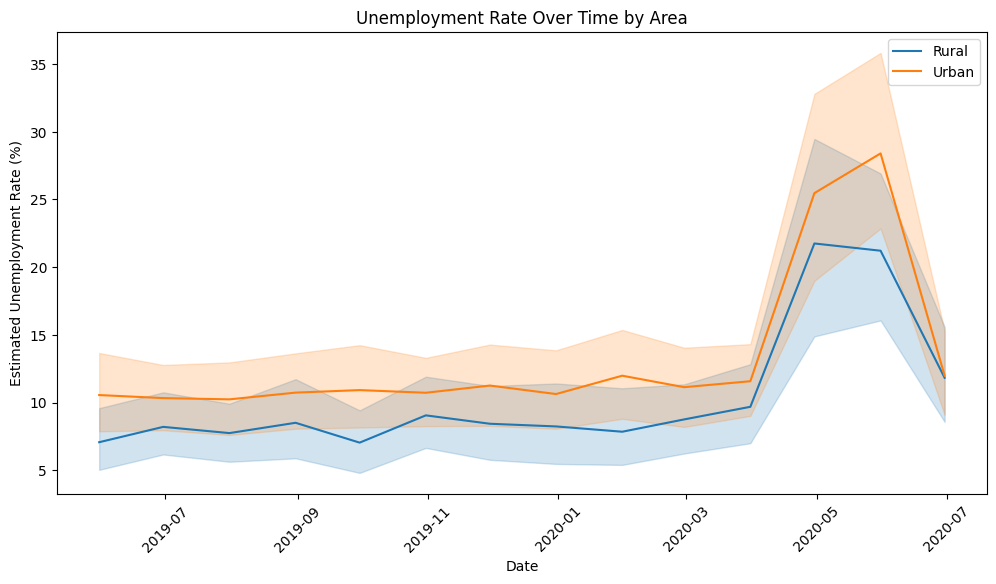

In [17]:
# Separate the dataset into rural and urban
data_rural = data_india[data_india['Area'] == 'Rural']
data_urban = data_india[data_india['Area'] == 'Urban']

# Plotting the Unemployment rate over time for Rural and Urban areas
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data_rural, label='Rural')
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data_urban, label='Urban')
plt.xticks(rotation=45)
plt.title('Unemployment Rate Over Time by Area')
plt.legend()
plt.show()


# rolling mean and standard deviation to visualize the trend and variation over time:

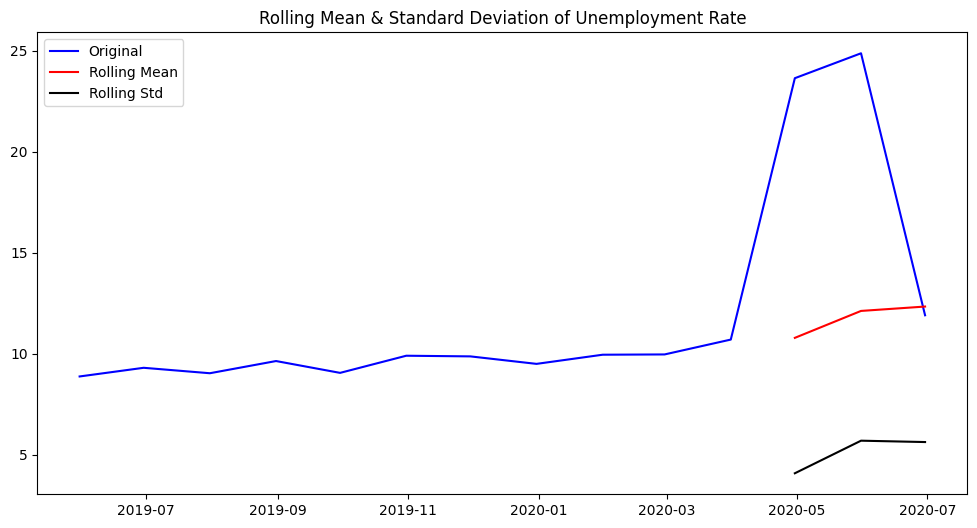

In [24]:
# Calculate rolling mean and standard deviation
rolling_mean = data_monthly.rolling(window=12).mean()
rolling_std = data_monthly.rolling(window=12).std()

# Plotting the rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data_monthly, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation of Unemployment Rate')
plt.show()



# Unemployment Rate Distribution by Region

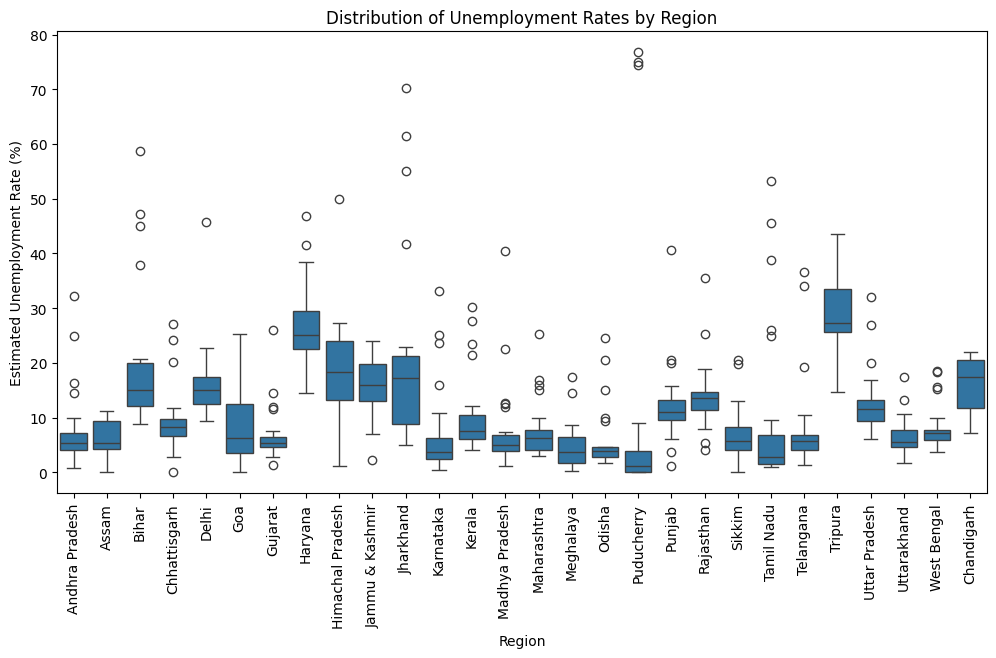

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=data_india)
plt.xticks(rotation=90)
plt.title('Distribution of Unemployment Rates by Region')
plt.show()


# Correlation Analysis

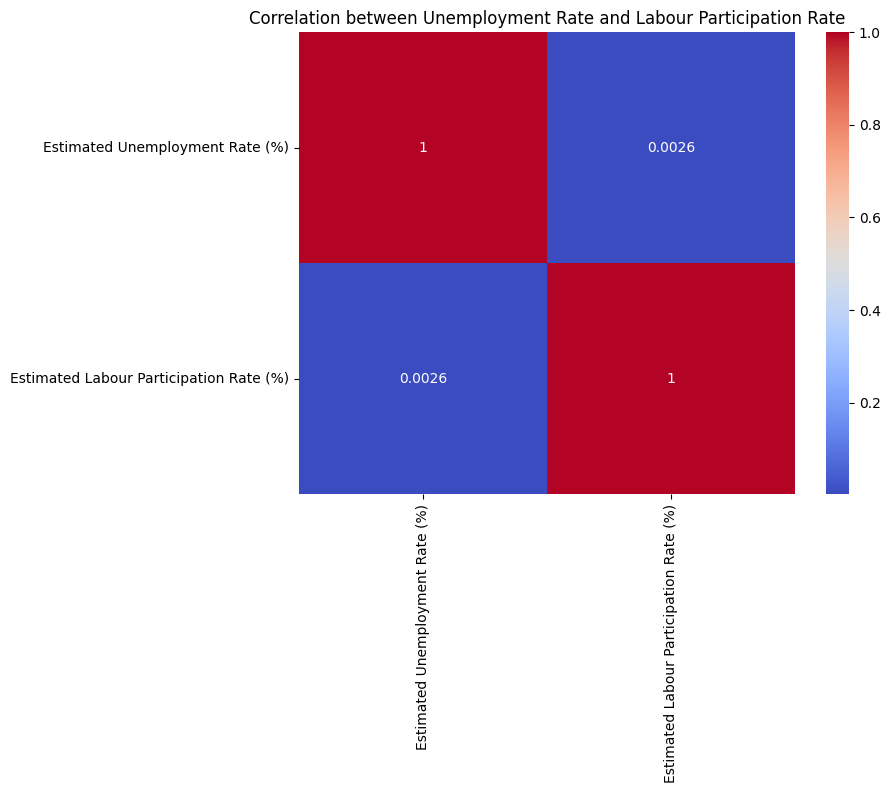

In [20]:
# Correlation plot
plt.figure(figsize=(8, 6))
sns.heatmap(data_india[['Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Unemployment Rate and Labour Participation Rate')
plt.show()


# Time Series Forecasting (Optional)

In [25]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
data_india = pd.read_csv('unemployment/Unemployment in India.csv')

# Strip leading spaces from column names and values in 'Date' column
data_india.columns = data_india.columns.str.strip()
data_india['Date'] = pd.to_datetime(data_india['Date'].str.strip(), format='%d-%m-%Y')

# Resample to get the monthly mean of the 'Estimated Unemployment Rate (%)' column
data_monthly = data_india.resample('M', on='Date')['Estimated Unemployment Rate (%)'].mean()

# Example of an ARIMA model - you might need to tune the parameters (p, d, q)
model = ARIMA(data_monthly, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)  # Forecasting the next 12 periods
print(forecast)



C:\Users\kavidha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kavidha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kavidha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kavidha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Use

2020-07-31    10.222164
2020-08-31    10.932301
2020-09-30    10.632382
2020-10-31    10.759050
2020-11-30    10.705553
2020-12-31    10.728147
2021-01-31    10.718604
2021-02-28    10.722635
2021-03-31    10.720932
2021-04-30    10.721651
2021-05-31    10.721348
2021-06-30    10.721476
Freq: M, Name: predicted_mean, dtype: float64


# Trend Analysis with Polynomial Fitting

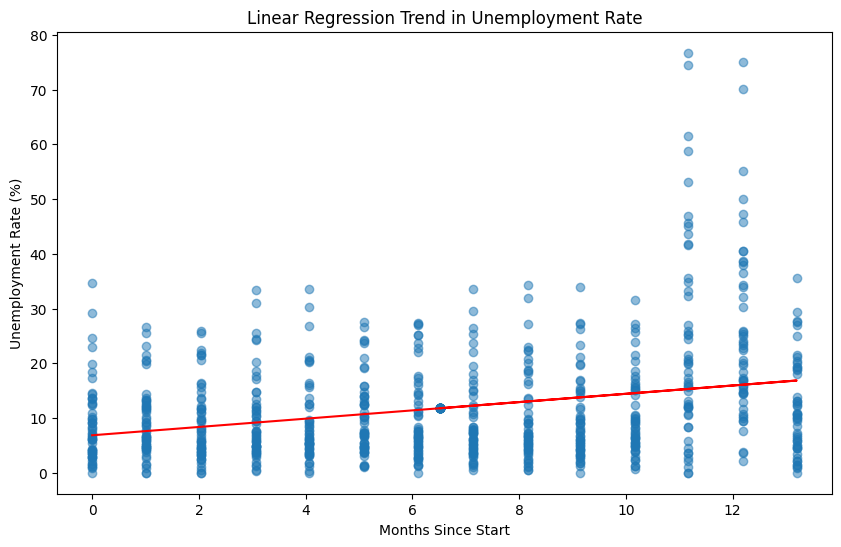

In [34]:

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data_india = pd.read_csv('unemployment/Unemployment in India.csv')

# Preprocessing steps
data_india.columns = data_india.columns.str.strip()
data_india['Date'] = pd.to_datetime(data_india['Date'].str.strip(), format='%d-%m-%Y')
data_india['Months_Since_Start'] = (data_india['Date'] - data_india['Date'].min()).dt.days / 30

# Fill NaN values in both 'Months_Since_Start' and 'Estimated Unemployment Rate (%)' with their respective means
data_india['Months_Since_Start'].fillna(data_india['Months_Since_Start'].mean(), inplace=True)
data_india['Estimated Unemployment Rate (%)'].fillna(data_india['Estimated Unemployment Rate (%)'].mean(), inplace=True)

# Reshaping data for sklearn
X = data_india['Months_Since_Start'].values.reshape(-1, 1)
y = data_india['Estimated Unemployment Rate (%)'].values

# Linear Regression
model = LinearRegression()
model.fit(X, y)

# Predictions for the line
y_pred = model.predict(X)

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.scatter(data_india['Months_Since_Start'], data_india['Estimated Unemployment Rate (%)'], alpha=0.5)
plt.plot(data_india['Months_Since_Start'], y_pred, color='red')
plt.xlabel('Months Since Start')
plt.ylabel('Unemployment Rate (%)')
plt.title('Linear Regression Trend in Unemployment Rate')
plt.show()


# Autocorrelation and Partial Autocorrelation Analysis

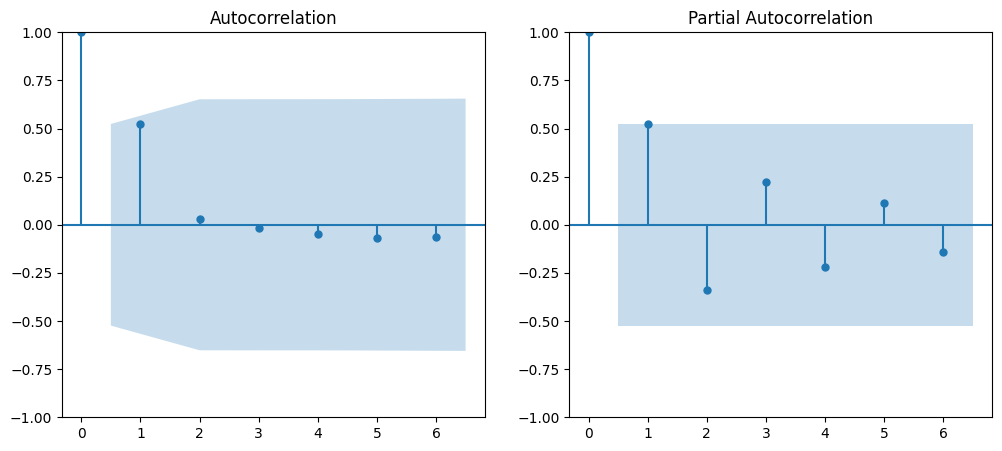

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Determine the maximum number of lags for PACF (half of the sample size)
max_lags = len(data_monthly) // 2 - 1

# Autocorrelation and Partial Autocorrelation plots
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_acf(data_monthly, ax=plt.gca(), lags=max_lags)
plt.subplot(122)
plot_pacf(data_monthly, ax=plt.gca(), lags=max_lags)
plt.show()



# Year and Month from Date

In [39]:
data_india['Date'] = pd.to_datetime(data_india['Date'], format='%d-%m-%Y')
data_india['Year'] = data_india['Date'].dt.year
data_india['Month'] = data_india['Date'].dt.month

# Print the first few rows to verify
print(data_india[['Date', 'Year', 'Month']].head())


        Date    Year  Month
0 2019-05-31  2019.0    5.0
1 2019-06-30  2019.0    6.0
2 2019-07-31  2019.0    7.0
3 2019-08-31  2019.0    8.0
4 2019-09-30  2019.0    9.0


# Season Based on Month

In [40]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

data_india['Season'] = data_india['Month'].apply(get_season)

# Print the first few rows to verify
print(data_india[['Month', 'Season']].head())


   Month  Season
0    5.0  Spring
1    6.0  Summer
2    7.0  Summer
3    8.0  Summer
4    9.0    Fall


# Employment Rate

In [41]:
data_india['Estimated Employment Rate (%)'] = 100 - data_india['Estimated Unemployment Rate (%)']

# Print the first few rows to verify
print(data_india[['Estimated Unemployment Rate (%)', 'Estimated Employment Rate (%)']].head())


   Estimated Unemployment Rate (%)  Estimated Employment Rate (%)
0                             3.65                          96.35
1                             3.05                          96.95
2                             3.75                          96.25
3                             3.32                          96.68
4                             5.17                          94.83


# Categorical Encoding for Area

In [42]:
data_india['Area_Code'] = data_india['Area'].astype('category').cat.codes

# Print the first few rows to verify
print(data_india[['Area', 'Area_Code']].head())


    Area  Area_Code
0  Rural          0
1  Rural          0
2  Rural          0
3  Rural          0
4  Rural          0
